In [1]:
import plotly
plotly.tools.set_credentials_file(username='luceven', api_key='###YOUR_API_KEY###')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
ageData = sorted(list(zip(df.Age.value_counts().index, df.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age, 
               y=productBuy, 
               name="How many products were sold",
               marker = dict(color=['#EA4A28', '#D3EA28', '#28EA4E', '#28EAE2', '#2008B9', '#E511E1', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [5]:
age0_17 = len(df[df.Age == "0-17"].User_ID.unique())
age18_25 = len(df[df.Age == "18-25"].User_ID.unique())
age26_35 = len(df[df.Age == "26-35"].User_ID.unique())
age36_45 = len(df[df.Age == "36-45"].User_ID.unique())
age46_50 = len(df[df.Age == "46-50"].User_ID.unique())
age51_55 = len(df[df.Age == "51-55"].User_ID.unique())
age55 = len(df[df.Age == "55+"].User_ID.unique())
agesBuyerCount = [age0_17,age18_25,age26_35,age36_45,age46_50,age51_55,age55]
               
trace1 = go.Bar(x = age,
                y = agesBuyerCount,
                name = "People count",
                marker = dict(color=['#F3B396', '#F3F196', '#A7F9AD', '#D5F0EF', '#AAADEE', '#EAC1E8', '#DF8787'],
                             line = dict(color='#7C7C7C', width = 1)),
                text = "Age: " + ageSeries)
data = [trace1]
layout = go.Layout(title= "How many people did shopping by ages")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [6]:
labels = sorted(df.City_Category.unique())
values = df.groupby("City_Category").sum()["Purchase"]
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
py.iplot([trace])

In [7]:
data = [go.Bar(
            x=df.Product_Category_1.value_counts().sort_index().index,
            y=df.Product_Category_1.value_counts().sort_index().values
    )]
layout = go.Layout(
    title='Most Purchased Product Category',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [8]:
x_Status = ['Single & Male', 'Single & Female', 'Married & Male', 'Married & Female']
y_Purchases = [df[(df.Gender == 'M') & (df.Marital_Status == 0)].Purchase.sum(),
              df[(df.Gender == 'F') & (df.Marital_Status == 0)].Purchase.sum(),
              df[(df.Gender == 'M') & (df.Marital_Status == 1)].Purchase.sum(),
              df[(df.Gender == 'F') & (df.Marital_Status == 1)].Purchase.sum()]

data = [go.Bar(x = x_Status, 
                y = y_Purchases,
              marker = dict(color=['rgb(0,212,65)','rgb(54,10,95)','rgb(5,22,205)','rgb(50,62,1)']))]
layout = go.Layout(title = 'Purchased Amount According To Gender and Marital Status (in US Dollars)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [9]:
# find total purchase
totalPurchase = df.Purchase.sum()

y_percentage = [i/totalPurchase*100 for i in df.groupby("Age").sum()["Purchase"].values]
y_purchase = [i for i in df.groupby("Age").sum()["Purchase"].values]
x_percentage = [i for i in age]
x_purchase = [i for i in age]

trace0 = go.Bar(x = y_percentage,
                y = x_percentage,
                marker = dict(color = '#BF5959', 
                              line = dict(
                                  color = '#FFFEA6', width = 1) 
                             ),
               name = "Percentage of purchases amount in dollars",
               orientation = "h"
               )
trace1 = go.Scatter(x = y_purchase,
                    y = x_purchase,
                    mode='lines+markers',
                    line=dict(
                        color='#5079DC'),
                    name='Purchases amount in dollars ',)
layout = dict(
                title='Purchases in $',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(y_percentage, decimals=2)
y_nw = np.rint(y_purchase)

for ydn, yd, xd in zip(y_nw, y_s, x_percentage):
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn - 20000,
                            text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 3,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        font=dict(family='Arial', size=10,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

layout['annotations'] = annotations

fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [10]:
data = [go.Box(y = df.Purchase, marker = dict(
        color = 'rgb(0, 128, 128)',
    ))]
py.iplot(data)

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [12]:
labels = sorted(df.Stay_In_Current_City_Years.unique())
values = df.Stay_In_Current_City_Years.value_counts().sort_index()

trace = go.Pie(labels=labels, values=values)

py.iplot([trace])

In [13]:
x_MaritalStatus = ['Single', 'Married']
y_PurchaseAmountAccordingToMaritalStatus = [int(df[df.Marital_Status == 0].Purchase.sum()), int(df[df.Marital_Status == 1].Purchase.sum())]

data = [go.Bar(x = x_MaritalStatus, 
                y = y_PurchaseAmountAccordingToMaritalStatus,
              marker = dict(color=['#0239E3','#E36502']))]
layout = go.Layout(title = 'Purchased Amount According To Marital Status (in US Dollars)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [14]:
x_Gender = ['Male', 'Female']
y_PurchaseAmountAccordingToGender = [df[df.Gender == 'M'].Purchase.sum(), df[df.Gender == 'F'].Purchase.sum()]

data = [go.Bar(x = x_Gender, 
                y = y_PurchaseAmountAccordingToGender,
              marker = dict(color=['#A6000D','#2ECEE7']))]
layout = go.Layout(title = 'Purchased Amount According To Gender (in US Dollars)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [15]:
# seaborn plotting
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



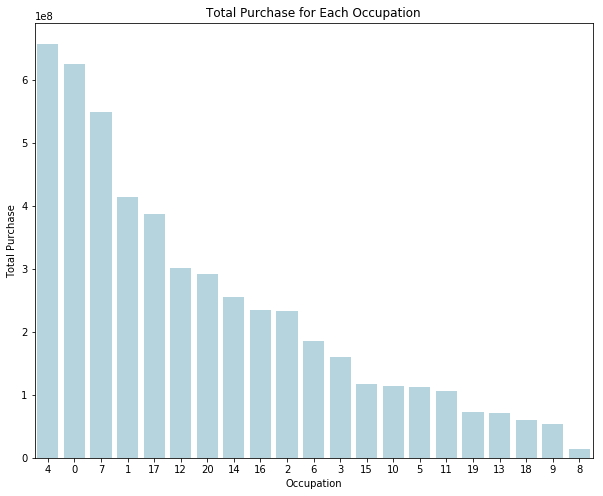

In [62]:
# Make columns lowercase
df.columns = [x.lower() for x in df.columns]
# Find which occupation spend more money
df_puramount = df[['occupation','purchase']]
df_puramount.occupation = df_puramount.occupation.astype(str)
occupation_list = list(df_puramount.occupation.unique())
purchase_sum = []

# Find total purchase for each occupations
for occu in occupation_list:
    purchase_sum.append(sum(df_puramount[df_puramount.occupation == occu].purchase))

# Create a new dataframe 
df_occupur = pd.DataFrame({'occupation':occupation_list,'total_purchase':purchase_sum})
df_occupur_sorted = df_occupur.sort_values(by=['total_purchase'],ascending = False)
# Seaborn BarPlot visulazation
plt.figure(figsize=(10,8))
sns.barplot(x = 'occupation',y = 'total_purchase', 
            order=df_occupur_sorted.occupation,
            color="lightblue", saturation=.7, 
            data = df_occupur_sorted)
plt.title('Total Purchase for Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Purchase')
plt.savefig("purchase_occupation.jpg")
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



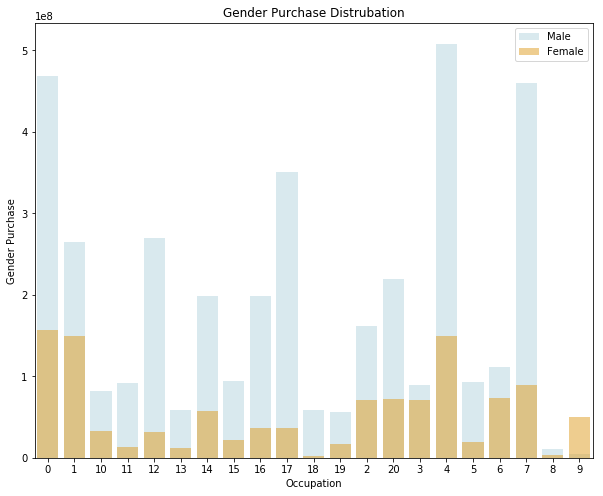

In [70]:
# Gender and occupation spend more money
df_genpuramount = df[['occupation', 'gender', 'purchase']]
df_genpuramount.occupation = df_genpuramount.occupation.astype(str)
occulist = list(df_genpuramount.occupation.unique())
male = []
female = []
for occu in occulist:
    df_genpuramount_temp = df_genpuramount[df_genpuramount.occupation == occu]
    male.append(df_genpuramount_temp[df_genpuramount_temp.gender=='M']['purchase'].sum())
    female.append(df_genpuramount_temp[df_genpuramount_temp.gender=='F']['purchase'].sum())
df_occupurgen = pd.DataFrame({'occupation':occulist,'male':male, 'female':female})
#Visualization
plt.subplots(figsize = (10,8))
sns.barplot(x = df_occupurgen.occupation, y = df_occupurgen.male, color='lightblue',
            alpha = 0.5, label = 'Male')
sns.barplot(x = df_occupurgen.occupation, y = df_occupurgen.female, color='orange',
            alpha = 0.5, label = 'Female')
plt.title('Gender Purchase Distrubation')
plt.xlabel('Occupation')
plt.ylabel('Gender Purchase')
plt.legend()
plt.savefig("Gender_Purchase.jpg")
plt.show()

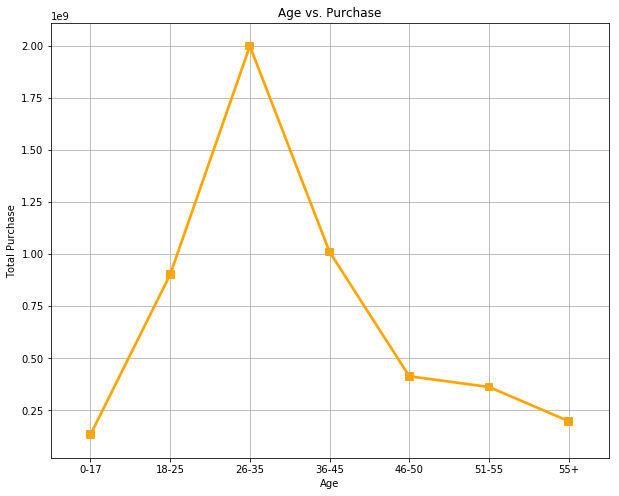

In [68]:
df.stay_in_current_city_years.replace('4+','4',inplace=True)
df.stay_in_current_city_years = df.stay_in_current_city_years.astype(int)
df.replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[0,1,2,3,4,5,6],inplace=True)
agelist = list(df.age.unique())
purchasesum=[]
for age in agelist:
    purchasesum.append(df[df.age == age].purchase.sum())
fig, ax =plt.subplots(figsize=(10,8))
sns.pointplot(x=agelist,y=purchasesum,color='orange',alpha=0.8, markers='s')
ax.set_xticklabels(['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
plt.title('Age vs. Purchase')
plt.xlabel('Age')
plt.ylabel('Total Purchase')
plt.savefig("age_purchase.jpg")
plt.grid()
plt.show()

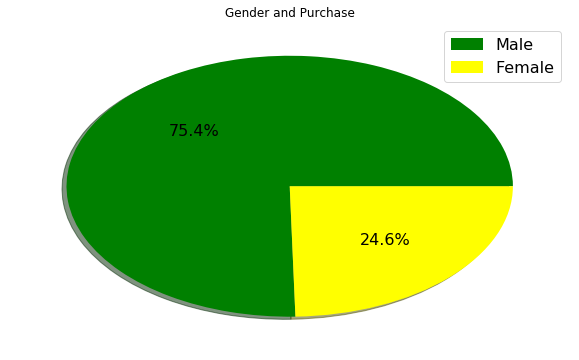

In [67]:
# Percentage of Gender
fig, ax =plt.subplots(figsize=(10,6))
labels = ['Male','Female']
colors = ['Green','Yellow']
sizes = [df[df.gender=='M'].gender.count(),df[df.gender=='F'].gender.count()]
plt.pie(sizes, shadow=True, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 16})
plt.legend(labels,prop={'size': 16})
plt.title("Gender and Purchase")
plt.savefig("gender_purchase.jpg")
plt.show()

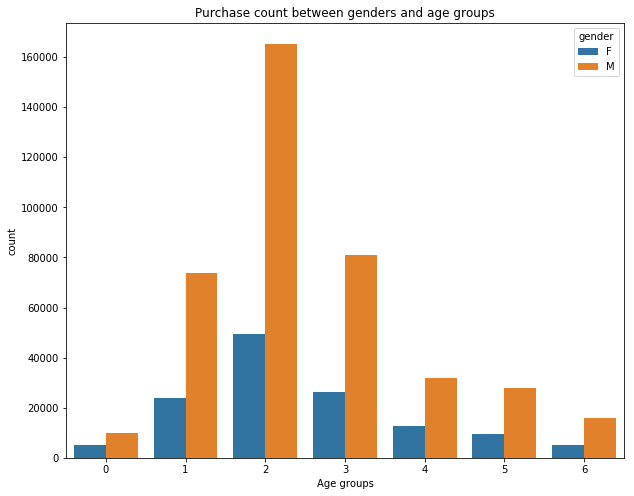

In [71]:
plt.subplots(figsize=(10,8))
sns.countplot(df['age'],hue=df['gender'])
plt.title("Purchase count between genders and age groups")
plt.xlabel("Age groups")
plt.savefig("purchase_agegroup.jpg")

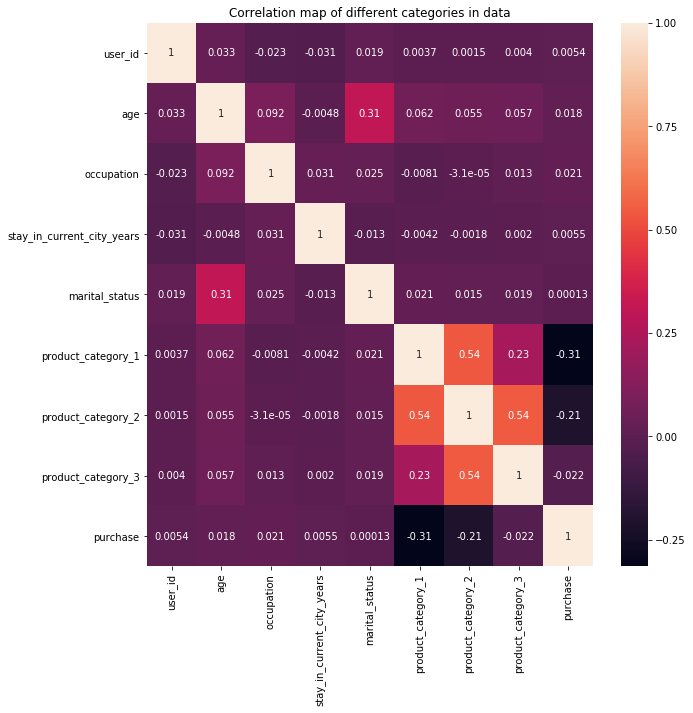

In [72]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation map of different categories in data")
plt.savefig("corr_matrix.jpg")

In [75]:
## modify age
dataset = pd.read_csv("BlackFriday.csv")
dataset['Age']=(dataset['Age'].str.strip('+'))
dataset.columns = [x.lower() for x in dataset.columns]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



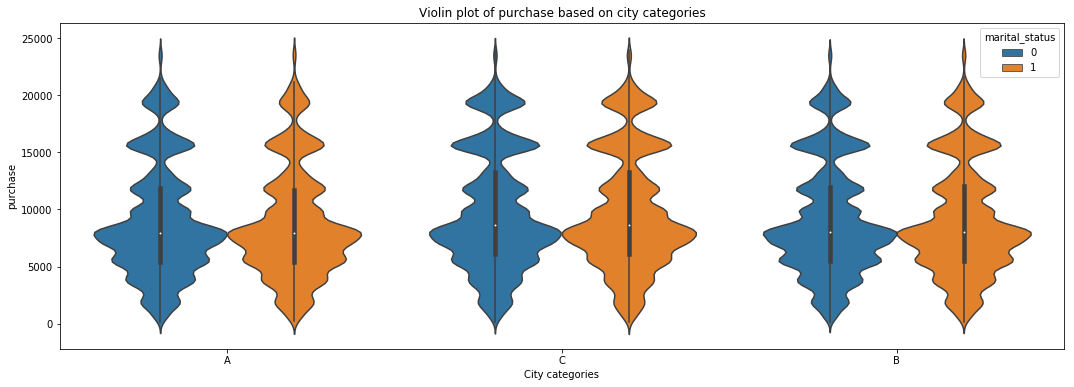

In [76]:
plt.subplots(figsize=(18,6))
sns.violinplot(x='city_category',y='purchase',hue='marital_status',data=df)
plt.title("Violin plot of purchase based on city categories")
plt.xlabel("City categories")
plt.savefig("violinplots.jpg")

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



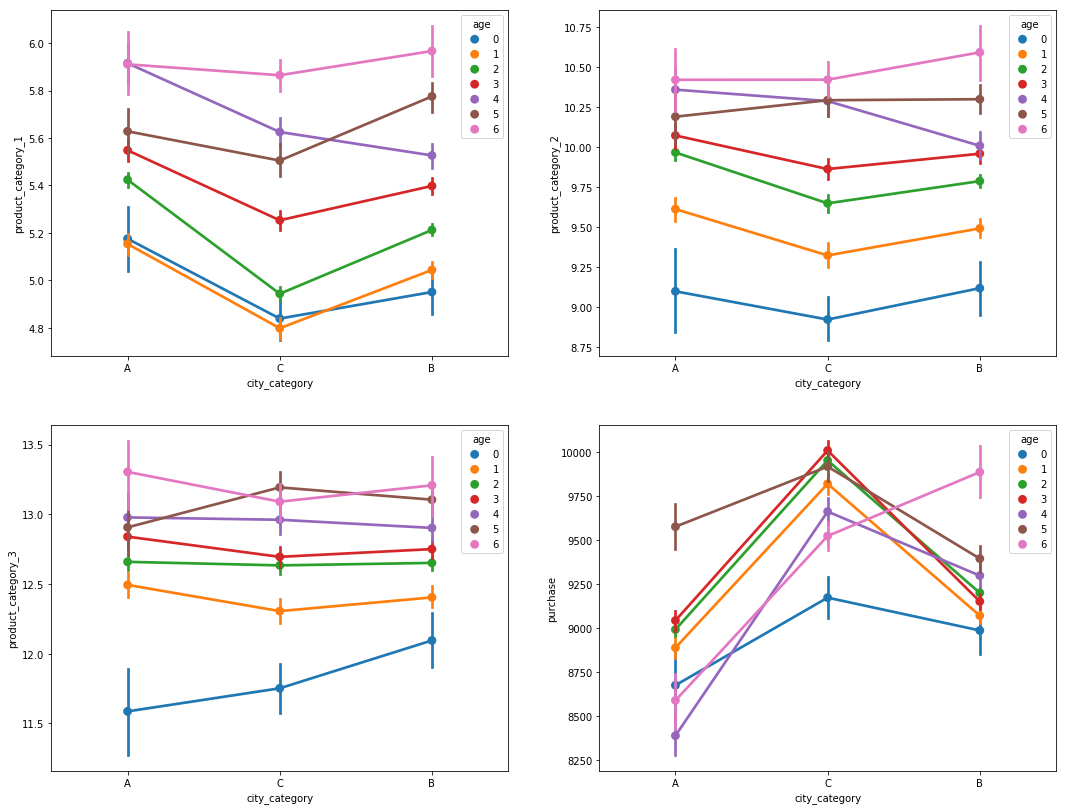

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='product_category_1', x='city_category', hue='age', data=df, ax=axes[0,0])
ax = sns.pointplot(y='product_category_2', x='city_category', hue='age', data=df, ax=axes[0,1])
ax = sns.pointplot(y='product_category_3', x='city_category', hue='age', data=df, ax=axes[1,0])
ax = sns.pointplot(y='purchase', x='city_category', hue='age', data=df, ax=axes[1,1])
plt.savefig("line_plots.jpg")